In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [11]:
df=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\downloads\Academic_Performance.csv")

In [12]:
df.describe()

,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE
count,12400.000000,12403.000000,12397.000000,12397.000000,12389.000000,12411.000000
mean,77.385887,62.191728,59.189562,67.501815,53.690532,68.446459
std,22.716227,27.669357,29.002446,25.505280,30.007993,25.867550
min,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,65.000000,42.000000,36.000000,51.000000,28.000000,51.000000
50%,85.000000,67.000000,65.000000,74.000000,56.000000,75.000000
75%,96.000000,86.000000,85.000000,88.000000,80.000000,90.000000
max,100.000000,100.000000,122.000000,111.000000,107.000000,100.000000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [15]:
df.shape

(12411, 13)

In [16]:
df.dtypes

STUDENT_ID             object
GENDER                 object
PLACEMENT              object
HONOR_OPTED_OR_NOT     object
EDUCATION_TYPE         object
ACADEMIC_PROGRAM       object
COURSE 1 MARKS        float64
COURSE 2 MARKS        float64
COURSE 3 MARKS        float64
COURSE 4 MARKS        float64
COURSE 5 MARKS        float64
PERCENTILE              int64
OVEARLL_GRADE          object
dtype: object

In [18]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [19]:
numeric_cols=df.select_dtypes(include='number').columns
categorial_cols=df.select_dtypes(include='object').columns


In [20]:
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

In [23]:
for col in categorial_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

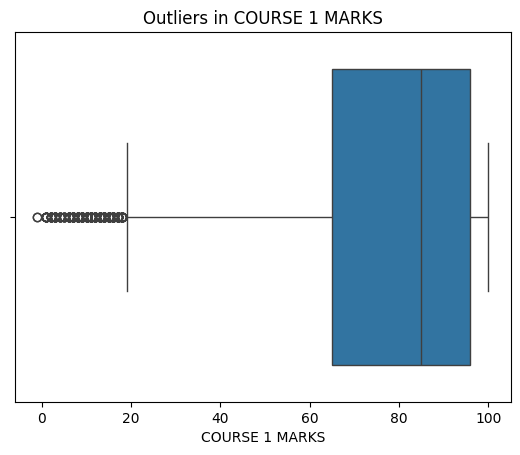

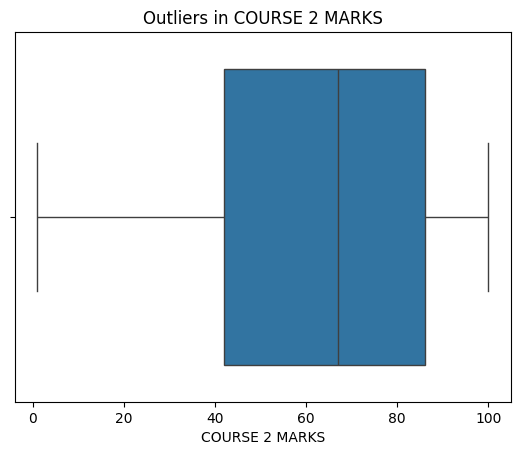

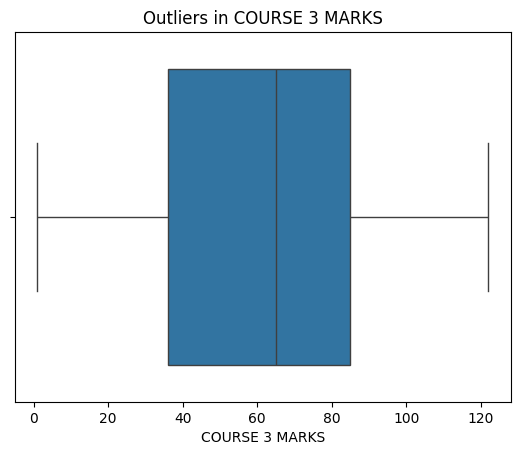

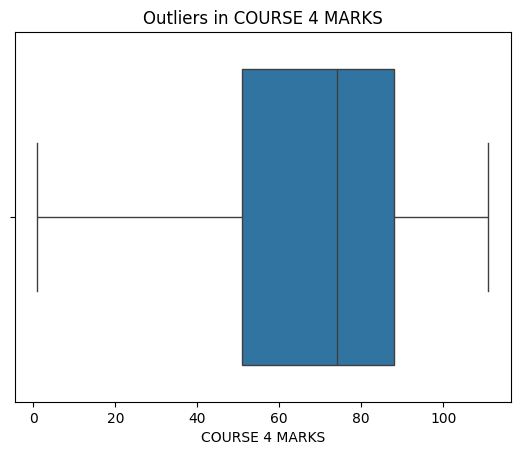

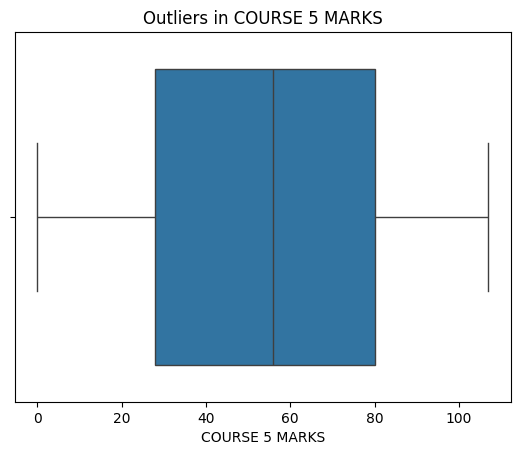

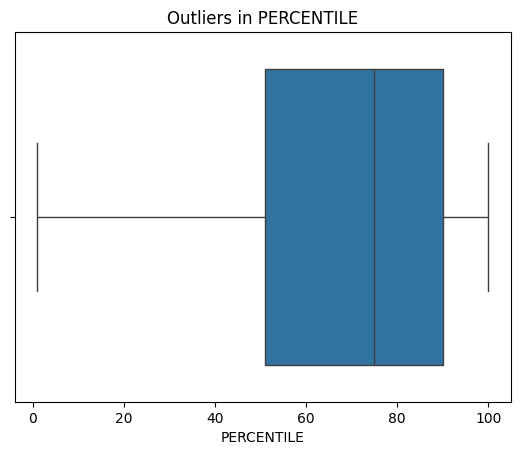

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

In [26]:
for col in numeric_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df[col]=df[col].clip(lower=lower,upper=upper)

In [27]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [28]:
print(df_encoded.head())
print(df_encoded.info())

   COURSE 1 MARKS  COURSE 2 MARKS  COURSE 3 MARKS  COURSE 4 MARKS  \
0            71.0            93.0            71.0            93.0   
1            97.0            38.0            86.0            98.0   
2            18.5             1.0            18.0            43.0   
3            65.0            35.0            76.0            80.0   
4            94.0            94.0            98.0           100.0   

   COURSE 5 MARKS  PERCENTILE  STUDENT_ID_SB11201210000137  \
0            79.0          91                        False   
1            78.0          92                         True   
2            22.0           7                        False   
3            48.0          67                        False   
4            71.0          98                        False   

   STUDENT_ID_SB11201210005154  STUDENT_ID_SB11201210007504  \
0                        False                        False   
1                        False                        False   
2                      